In [0]:
from chainer import links as L
from chainer import functions as F
from chainer import optimizers
from chainer import Variable
from chainer import Sequential
import chainer
import pandas as pd
import numpy as np
import codecs
import matplotlib.pyplot as plt

from chainer import Chain, iterators, datasets

In [0]:
    # Shift_JIS ファイルのパス
    shiftjis_csv_path = './pollen_kyusyu.csv'
    # UTF-8 ファイルのパス
    utf8_csv_path = './pollen_kyusyu_utf.csv'

    # 文字コードを utf-8 に変換して保存
    fin = codecs.open(shiftjis_csv_path, "r", "shift_jis")
    fout_utf = codecs.open(utf8_csv_path, "w", "utf-8")
    for row in fin:
        fout_utf.write(row)
    fin.close()
    fout_utf.close()

In [0]:
# CSV取り込み
df = pd.read_csv("pollen_kyusyu_utf.csv",parse_dates=['meas_day'])

In [0]:
# CSV取り込み
df = pd.read_csv("pollen_kyusyu.csv")

In [80]:
# データ確認
df.head(1)

,0,1,wind,wind_speed,temperature,precipitation,rain_boolean
0,2019-02-01,0,15,10,3,0,0


In [63]:
# 不要なカラムを削除
df.drop(['meas_cd','meas_station','Unnamed: 5','prefecture_name','city_name','Unnamed: 1','meas_day','meas_time','prefecture_cd','city_cd'], axis=1, inplace=True)
df.head(1)

,pollen_cnt,wind,wind_speed,temperature,precipitation,rain_boolean
0,0,12.0,3.0,5.8,0.0,0


In [92]:
df.columns[[0,1]]

Index(['0 ', ' 1 '], dtype='object')

In [95]:
# 不要なカラムを削除
df_out = df.drop(df.columns[[0,1]], axis=1).copy()
df_out.head(1)

,wind,wind_speed,temperature,precipitation,rain_boolean
0,15,10,3,0,0


In [94]:
df.head()

,0,1,wind,wind_speed,temperature,precipitation,rain_boolean
0,2019-02-01,0,15,10,3,0,0
1,2019-02-01,0,15,10,2,0,0
2,2019-02-01,0,15,9,3,0,0
3,2019-02-01,0,15,9,2,0,0
4,2019-02-01,4,15,7,2,0,0


In [64]:
# とりあえず少ない件数で行ってみる
df2 = df.drop(range(10000,13439)).copy()
df2.head()

,pollen_cnt,wind,wind_speed,temperature,precipitation,rain_boolean
0,0,12.0,3.0,5.8,0.0,0
1,0,11.0,1.0,4.9,0.0,0
2,0,11.0,2.0,5.5,0.0,0
3,0,10.0,2.0,5.2,0.0,0
4,0,10.0,2.0,5.4,0.0,0


In [0]:
# とりあえず少ない件数で行ってみる(再学習データ)
df2 = df.drop(range(0,13339)).copy()
df2.head()

,pollen_cnt,wind,wind_speed,temperature,precipitation,rain_boolean
13339,8,1.0,3.0,10.0,0.0,0
13340,4,1.0,2.0,10.0,0.0,0
13341,0,2.0,2.0,10.9,0.0,0
13342,8,2.0,2.0,10.2,0.0,0
13343,4,3.0,1.0,10.1,0.0,0


In [0]:
df2

,pollen_cnt,wind,wind_speed,temperature,precipitation,rain_boolean
0,0,12.0,3.0,5.8,0.0,0
1,0,11.0,1.0,4.9,0.0,0
2,0,11.0,2.0,5.5,0.0,0
3,0,10.0,2.0,5.2,0.0,0
4,0,10.0,2.0,5.4,0.0,0
5,0,12.0,2.0,5.5,0.0,1
6,0,13.0,3.0,5.5,0.0,0
7,4,12.0,3.0,5.1,0.0,0
8,0,11.0,2.0,5.4,0.0,0
9,0,12.0,3.0,5.2,0.0,0


In [0]:
#欠損値の数を確認
df2.isnull().sum()

pollen_cnt       0
wind             1
wind_speed       1
temperature      1
precipitation    1
rain_boolean     0
dtype: int64

In [0]:
# 欠損値の行数を取得
df.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
        ..
13410    0
13411    0
13412    0
13413    0
13414    0
13415    0
13416    0
13417    0
13418    0
13419    0
13420    0
13421    0
13422    0
13423    0
13424    0
13425    0
13426    0
13427    0
13428    0
13429    0
13430    0
13431    0
13432    0
13433    0
13434    0
13435    0
13436    0
13437    0
13438    0
13439    0
Length: 13440, dtype: int64

In [0]:
df_x = df2.copy()

In [0]:
df_x.isnull()

In [0]:
df_x[df_x.notnull()]=0  ### 欠損値以外を0にする
df_x[df_x.isnull()]=1   ### 欠損値を1にする
df_x.head()

,pollen_cnt,wind,wind_speed,temperature,precipitation,rain_boolean
0,0,0.0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,0.0,0
2,0,0.0,0.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0.0,0
4,0,0.0,0.0,0.0,0.0,0


In [0]:
#欠損値を埋める方法
X['AgeFill'] = X['Age'].fillna(X['Age'].mean())

In [0]:
df_x[df_x.wind == 1]

In [0]:
df['wind'].where(df['wind'] == None)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
         ..
13410   NaN
13411   NaN
13412   NaN
13413   NaN
13414   NaN
13415   NaN
13416   NaN
13417   NaN
13418   NaN
13419   NaN
13420   NaN
13421   NaN
13422   NaN
13423   NaN
13424   NaN
13425   NaN
13426   NaN
13427   NaN
13428   NaN
13429   NaN
13430   NaN
13431   NaN
13432   NaN
13433   NaN
13434   NaN
13435   NaN
13436   NaN
13437   NaN
13438   NaN
13439   NaN
Name: wind, Length: 13440, dtype: float64

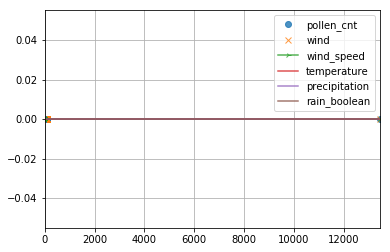

In [0]:
df_x.plot(style=['o','x','4-'], alpha=0.8, grid=True)

In [0]:
# 学習データセット
df3 = df2.copy()
df3.drop(['pollen_cnt'], axis=1, inplace=True)

In [0]:
df3.head(3)

,wind,wind_speed,temperature,precipitation,rain_boolean
13339,1.0,3.0,10.0,0.0,0
13340,1.0,2.0,10.0,0.0,0
13341,2.0,2.0,10.9,0.0,0


In [0]:
#chainerは32bitだけなので64から32に変換
x = df3.values.astype(np.float32) 
x

array([[ 1. ,  3. , 10. ,  0. ,  0. ],
       [ 1. ,  2. , 10. ,  0. ,  0. ],
       [ 2. ,  2. , 10.9,  0. ,  0. ],
       [ 2. ,  2. , 10.2,  0. ,  0. ],
       [ 3. ,  1. , 10.1,  0. ,  0. ],
       [ 1. ,  1. , 10.2,  0. ,  0. ],
       [ 1. ,  2. , 10.6,  0. ,  0. ],
       [ 0. ,  0. ,  9.7,  0. ,  0. ],
       [14. ,  1. ,  9.9,  0. ,  0. ],
       [11. ,  0. ,  9.3,  0. ,  0. ],
       [ 2. ,  0. ,  9.5,  0. ,  2. ],
       [ 1. ,  2. , 10.8,  1. ,  2. ],
       [ 4. ,  0. , 10.8,  0. ,  1. ],
       [ 9. ,  0. , 10.5,  0. ,  1. ],
       [ 7. ,  0. , 11.3,  0. ,  0. ],
       [ 9. ,  1. , 12.5,  0. ,  0. ],
       [ 9. ,  1. , 13.3,  0. ,  0. ],
       [ 9. ,  1. , 13.9,  0. ,  0. ],
       [10. ,  2. , 13.4,  0. ,  0. ],
       [ 9. ,  0. , 13.7,  0. ,  0. ],
       [ 9. ,  1. , 14.2,  0. ,  0. ],
       [11. ,  1. , 14.1,  0. ,  0. ],
       [10. ,  1. , 13.4,  0. ,  0. ],
       [10. ,  1. , 13.1,  0. ,  0. ],
       [11. ,  0. , 12.7,  0. ,  0. ],
       [12. ,  0. , 11.9,

In [0]:
df4 = df2.copy()
df4.drop(['wind','wind_speed','temperature','precipitation','rain_boolean'], axis=1, inplace=True)
df4.head(1)

,pollen_cnt
0,0


In [0]:
t = df4.values.astype(np.float32)
t[5]

array([0.], dtype=float32)

In [0]:
t[5]

array([0.], dtype=float32)

In [0]:
# 4. AIを作成する  
MLP_Region = Sequential(
    L.Linear(5, 1),F.relu
)

In [0]:
class MLP_Region(chainer.Chain):
    def __init__(self):
      super(MLP, self).__init__()
      with self.init_scope():
        self.fc1 = L.Linear(5, 1)

In [0]:
# 5. ネットワークの構成や，最適化器のパラメータなどのAIのハイパーパラメータを調整してテストデータでもうまくいくようにする  
# 最適化器の設定
Region_opt = optimizers.Adam()
Region_opt.use_cleargrads()
Region_opt.setup(MLP_Region)
epochs = 1000

for epoch in range(epochs):
  # xが画像，tがラベル
  x_ = Variable(x)
  #print(x_)
  t_ = Variable(t)
  #print(t_)
  #Nanが起きた原因は空の値があったため！！
  
  
  # 回帰のときはこれで更新
  # ネットワークの出力を出す
  y = MLP_Region(x_)
  #print(y)
  # 誤差計算
  loss = F.mean_squared_error(y, t)
  
  # 勾配初期化
  MLP_Region.cleargrads()
  # 誤差逆伝播
  loss.backward()
  # パラメータの更新
  Region_opt.update()
print(loss)
print(y)

TypeError: ignored

In [0]:
# 正規化したパターンとRNNを利用したパターンを考える

In [0]:
import cupy


In [0]:
# モデルクラスの定義
class RNN(Chain):
    def __init__(self):
        super(RNN, self).__init__()
        with self.init_scope():
            self.r1 = L.LSTM(None, 5)
            self.l1 = L.Linear(5, 1)#線形シャドウ

    # call関数の定義 
    def __call__(self, x):
        h_r1 = self.r1(x)
        return self.l1(h_r1)

    # 勾配の初期化とメモリの初期化
    def reset(self):
        self.r1.reset_state()

In [0]:
# モデルクラスの定義
class RNN(Chain):
    def __init__(self):
        super(RNN, self).__init__()
        with self.init_scope():
          self.l1 = L.LSTM(None, 5)
          self.l2 = L.LSTM(5, 5)#ニューロンを増やせば増やすほど、表現力が上がるが過学習になる可能性がある
          self.l3 = L.LSTM(5, 5)
          self.l4 = L.LSTM(5, 1)

    # call関数の定義 
    def __call__(self, x):
      h_l1 = self.l1(x)
      h_l2 = self.l2(h_l1)
      h_l3 = self.l3(h_l2)
      return self.l4(h_l3)

    # 勾配の初期化とメモリの初期化
    def reset(self):
      self.l1.reset_state()
      self.l2.reset_state()
      self.l3.reset_state()
      self.l４.reset_state()

In [108]:
# モデルの定義
rnn= RNN()
#rnn.to_gpu()
opt = optimizers.Adam()
opt.setup(rnn)

# 学習ループ
max_epoch = 10
for epoch in range(max_epoch):
    # lossとモデルを初期化
    loss = 0
    rnn.reset()

    # 一定期間誤差を蓄積する
    for i in range(x.shape[1]):
        # データfloat32の場合はshapeを意識して"[:, i:i+1]"とする
        # i:i+1→で i 番目を開始地点にして，　1つだけデータを抜き出す
        #x = Variable(cupy.asarray(train[:, i:i+1]))
        #t = Variable(cupy.asarray(teach[:, i:i+1]))
        x_ = Variable(x[:,i:i+1])
        print(x_)
        t_ = Variable(t[:,i:i+1])
        print(t_)
        
        # モデルの出力
        y = rnn(x_)
        
        # 誤差を足し合わせる
        loss = loss + F.mean_squared_error(y, t_)
    
    # BPTTの適用
    rnn.cleargrads()
    loss.backward()
    loss.unchain_backward()
    opt.update()
    
    if epoch % 100 == 0:
      print('loss:', loss.data)

# モデルをcpuに戻しておく
#rnn.to_cpu()

variable([[ 1.]
          [ 1.]
          [ 2.]
          [ 2.]
          [ 3.]
          [ 1.]
          [ 1.]
          [ 0.]
          [14.]
          [11.]
          [ 2.]
          [ 1.]
          [ 4.]
          [ 9.]
          [ 7.]
          [ 9.]
          [ 9.]
          [ 9.]
          [10.]
          [ 9.]
          [ 9.]
          [11.]
          [10.]
          [10.]
          [11.]
          [12.]
          [ 0.]
          [ 0.]
          [14.]
          [ 3.]
          [13.]
          [ 1.]
          [ 1.]
          [ 0.]
          [ 0.]
          [16.]
          [ 0.]
          [ 3.]
          [ 7.]
          [15.]
          [11.]
          [10.]
          [10.]
          [10.]
          [11.]
          [11.]
          [13.]
          [16.]
          [ 1.]
          [ 1.]
          [ 2.]
          [ 1.]
          [ 2.]
          [ 4.]
          [ 5.]
          [ 4.]
          [ 6.]
          [ 1.]
          [ 2.]
          [ 2.]
          [ 3.]
          [ 1.]
        

InvalidType: ignored

In [117]:
# モデルの定義
rnn= RNN()
rnn.to_gpu()
opt = optimizers.Adam()
opt.setup(rnn)

#print(x)
#print(t)
print(x.shape)
print(y.shape)

# 学習ループ
max_epoch = 5000
for epoch in range(max_epoch):
    # lossとモデルを初期化
    loss = 0
    rnn.reset()

    # 一定期間誤差を蓄積する
    #for i in range(x.shape[0]-1):
    for i in range(x.shape[0]):
        #print(i)
        #print(x)
        #print(t)
        # データfloat32の場合はshapeを意識して"[:, i:i+1]"とする
        # i:i+1→で i 番目を開始地点にして，　1つだけデータを抜き出す
        x_ = Variable(cupy.asarray(x[i:i+1]))
        t_ = Variable(cupy.asarray(t[i:i+1]))
        #print("x:",x_)
        #print("t:",t_)
        # モデルの出力
        y = rnn(x_)
        #print("y:",y)
        
        # 誤差を足し合わせる
        loss = loss + F.mean_squared_error(y, t_)
    
    # BPTTの適用
    rnn.cleargrads()
    loss.backward()
    loss.unchain_backward()
    opt.update()
    
    #print(epoch)
    
    if epoch % 100 == 0:
      print('loss:', loss.data)
#print(y)
# モデルをcpuに戻しておく
#rnn.to_cpu()
#学習していないデータを試す！！
for i in range(x.shape[0]):
    x_ = Variable(cupy.asarray(x[i:i+1]))
    t_ = Variable(cupy.asarray(t[i:i+1]))
    # モデルの出力
    y = rnn(x_)
    print(y)
    
# 作成したモデルの保存方法は？というか学習したネットワークは保存可能？？？学習ループ後の誤差が少ないモデルを保存したい！！！
# 実運用に載せる為にエンドポイントを作成する
# API化検討

(101, 5)
(1, 1)
loss: 6525.8125
loss: 6057.9277
loss: 5848.849
loss: 5739.5293
loss: 5641.297
loss: 5575.917
loss: 5515.3193
loss: 5458.3213
loss: 5281.84
loss: 5182.7866
loss: 5129.004
loss: 5105.6826
loss: 5068.8193
loss: 5041.582
loss: 5000.387
loss: 4961.5586
loss: 4921.5996
loss: 4878.2705
loss: 5251.6045
loss: 5195.3916
loss: 5142.8613
loss: 5060.9165
loss: 4948.1343
loss: 4855.8057
loss: 4797.6094
loss: 4748.042
loss: 4708.0938
loss: 4662.62
loss: 4620.428
loss: 4598.733
loss: 4536.3955
loss: 4512.4805
loss: 4417.695
loss: 4356.632
loss: 4285.9014
loss: 4207.5376
loss: 4142.875
loss: 4081.0762
loss: 4018.3667
loss: 3954.6511
loss: 3891.8262
loss: 3831.2327
loss: 3773.0073
loss: 3716.5366
loss: 3658.9373
loss: 3604.0586
loss: 3552.1426
loss: 3502.332
loss: 3454.6829
loss: 3408.5977
variable([[17.651815]])
variable([[17.460667]])
variable([[15.605942]])
variable([[11.998243]])
variable([[10.039565]])
variable([[9.090769]])
variable([[8.884951]])
variable([[8.955883]])
variable([[8

In [0]:
#npyのファイルでモデルを保存できる！！
# 学習ループの回数はいくつがベスト
#ほんとは３つに分ける
#学習データ　テストデータ　バリデーションデータ　n-1交差方　で誤差　学習しないデータは誤差値だけとって放置

In [0]:
from chainer import serializers

In [0]:
serializers.save_npz("mymodel_new.npz", rnn) # npz形式で書き出し

In [0]:
serializers.load_npz("mymodel.npz", rnn) # "mymodel.npz"の情報をmodelに読み込む

In [0]:
# モデルの定義
rnn= RNN()
serializers.load_npz("mymodel.npz", rnn)
rnn.to_gpu()
opt = optimizers.Adam()
opt.setup(rnn)

In [0]:
#じょうりゅう→モデルの軽量化

In [0]:
#t検定 という方法がある